In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(110)

## 生成数据

In [2]:
hours = np.arange(1, 25, 1)

# 生成电力交易数据
buying = np.random.randint(-5000, 0, size=len(hours))
selling = np.random.randint(0, 10000, size=len(hours))
selling[np.random.rand(len(hours)) < 0.7] = 0  # 模拟部分时间无售电

# 生成电价数据
actual_price = np.sin(hours / 3) * 0.02 + 0.02 + np.random.rand(len(hours)) * 0.003
predicted_price = actual_price + np.random.randn(len(hours)) * 0.001
lower_bound = actual_price - 0.003
upper_bound = actual_price + 0.003

In [3]:
pd.DataFrame(data={
    'hours': hours,
    'buying': buying,
    'selling': selling,
    'actual_price': actual_price,
    'predicted_price': predicted_price,
    'lower_bound': lower_bound,
    'upper_bound': upper_bound
})

,hours,buying,selling,actual_price,predicted_price,lower_bound,upper_bound
0,1,-2824,0,0.028529,0.027166,0.025529,0.031529
1,2,-3237,0,0.033570,0.032077,0.030570,0.036570
2,3,-2891,0,0.039345,0.037749,0.036345,0.042345
3,4,-3705,0,0.040654,0.040508,0.037654,0.043654
4,5,-473,4309,0.040108,0.040339,0.037108,0.043108
5,6,-2056,838,0.040089,0.041174,0.037089,0.043089
6,7,-3138,1924,0.034972,0.034351,0.031972,0.037972
7,8,-1062,0,0.031784,0.031351,0.028784,0.034784
8,9,-2701,0,0.023504,0.024038,0.020504,0.026504
9,10,-2207,7367,0.016434,0.017058,0.013434,0.019434


## 可视化

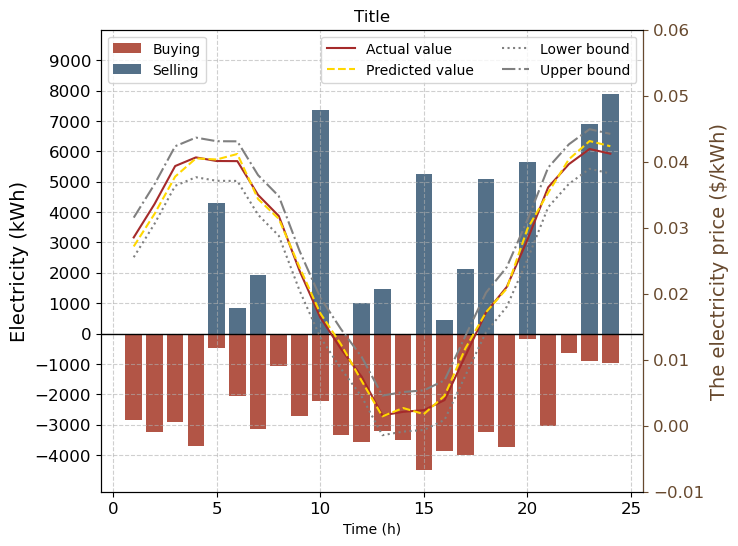

In [ ]:
fig, ax1 = plt.subplots(figsize=(7, 6))


ax1.grid(True, linestyle='--', alpha=0.6)
ax1.axhline(0, color='black', linewidth=1)  # 0刻度

# 柱状图
ax1.bar(hours, buying, color='#b25546', label='Buying')
ax1.bar(hours, selling, color='#547088', label='Selling')
ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)", color='black', fontsize=14)
ax1.set_yticks([-4000 + i*1000 for i in range(14)])
ax1.tick_params(axis='both', labelsize=12)
ax1.set_ylim(-5200,10000)
ax1.legend(loc="upper left")

# 折线图
ax2 = ax1.twinx()
ax2.spines['right'].set_color('#67492e')
ax2.plot(hours, actual_price, color='brown', linestyle='-', label='Actual value')
ax2.plot(hours, predicted_price, color='gold', linestyle='--', label='Predicted value')
ax2.plot(hours, lower_bound, color='gray', linestyle='dotted', label='Lower bound')
ax2.plot(hours, upper_bound, color='gray', linestyle='dashdot', label='Upper bound')
ax2.set_ylabel("The electricity price ($/kWh)", color='#67492e', fontsize=14)
ax2.tick_params(axis='y', colors='#67492e', labelsize=12)
ax2.set_ylim(-0.01,0.06)
ax2.legend(loc="upper right", ncols=2)

plt.title("Title")
plt.show()